Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers 
(depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small,
and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more 
through the interest on loans. In particular, the management wants to explore ways of converting its liability customers 
to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability 
customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to 
devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability 
of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank_Personal_Loan_Modelling.csvView in a new window  contains data on 5000 customers. The data include customer 
demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.),
and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) 
accepted the personal loan that was offered to them in the earlier campaign.

* Follow the instructions below and create a python notebook to attempt the same :

Read the column description and ensure you understand each attribute well
Study the data distribution in each attribute, share your findings. (5 points)
Get the target column distribution. Your comments (5 points)
Split the data into training and test set in the ratio of 70:30 respectively ( 5 points)
Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer 
buying personal loans (25 points)
Print the confusion matrix for all the above models (10 points)
Give your reasoning on which is the best model in this case and why it performs better? (10 points)

In [96]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
#importing seaborn for statistical plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
#to split data into test and train
from sklearn.model_selection import train_test_split
#import appropriate metrices
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve
#to normalise the xdata
from scipy.stats import zscore
#importing scaler
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#for k fold
from sklearn import model_selection

In [97]:
bank_df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")
bank_df.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]
bank_df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [98]:
bank_df.info()
#none of the values is null and all the values are in integer/float. Here Personal Loan is our target variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                   5000 non-null int64
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [99]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


UNIVARIATE Analysis

[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]


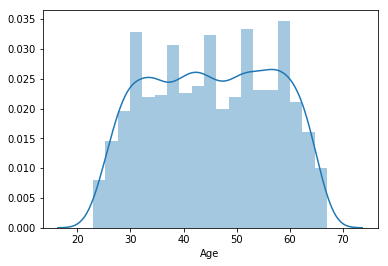

In [100]:
#Age data
#==============
print(bank_df.Age.unique())

#sns.distplot(bank_df['Age'], kde=False, rug=True)
sns.distplot(bank_df['Age'])

#Age seems to be a contineous variable and almost normally distributed where the value of age lie between 20 to 70 with 
#mean as 45. 

[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]


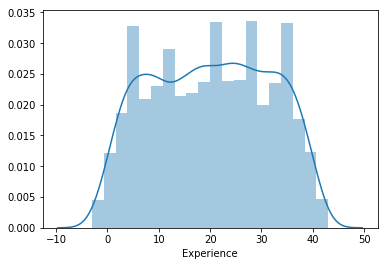

In [101]:
#Experience Data
#======================

print(bank_df.Experience.unique())

#sns.distplot(bank_df['Age'], kde=False, rug=True)
sns.distplot(bank_df['Experience'])

#experience seems to be a contineous variable and almost normally distributed with mean as 20.10. 
#But there are negative values in experience . Experience cannot be negative. We need to clean/process it.

In [102]:
#we will try to find how many values are 
print("number of negative values in experience",bank_df[bank_df['Experience'] < 0]['Experience'].count())
newdf=bank_df[bank_df['Experience'] < 0]
newdf
# there are 52 rows with experience as negative, which might be due to wrong data entry
#which is quite low as we have 5000 data points ,but
#we can change those 52 data points to their positive values because if we compare age with their experience, the absolute
#value of experience seems relevant

number of negative values in experience 52


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [103]:
#changing the negative data to absolute values
#=============================================
bank_df['Experience']=bank_df['Experience'].abs()
print("number of negative values in experience after abs",bank_df[bank_df['Experience'] < 0]['Experience'].count())
bank_df.head()

number of negative values in experience after abs 0


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]


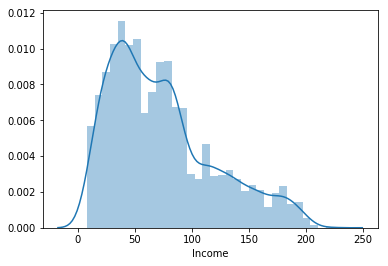

In [104]:
#Income data
#==============
print(bank_df.Income.unique())
sns.distplot(bank_df['Income'])
#Income seems to be a contineous variable which is positively skewed. 
# Majority of the customers have income between 45K and 55K. with mean as 73.77K


[4 3 1 2]


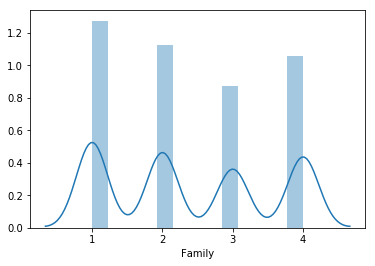

In [105]:
#Family data
#=================
print(bank_df.Family.unique())
sns.distplot(bank_df['Family'])
#family seem to be a categorical-ordinal variable whose values are 4,3,2,1. 

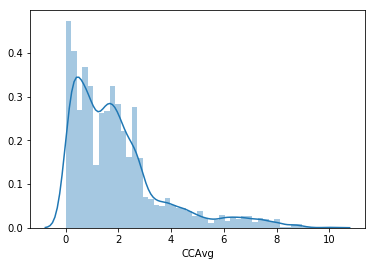

In [106]:
#CCAvg data
#==================
sns.distplot(bank_df['CCAvg'])

#CCAvg is a contineous and also a positively skewed variable 
#Average spending is between 0K to 10K and majority spends less than 3K

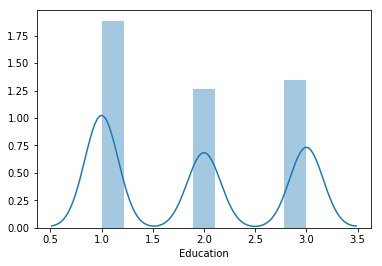

In [107]:
#Education data
#===================
sns.distplot(bank_df['Education'])

#Education is also a categorical-ordinal variable whose values are 3,2,1.

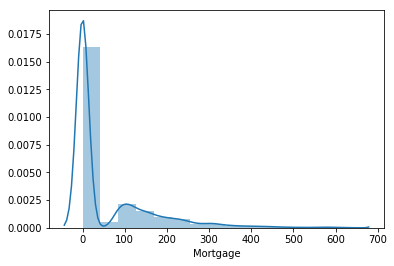

In [108]:
#Mortgage data
#=======================
sns.distplot(bank_df['Mortgage'],bins=15)
#Mortgage is a contineous variable with majority of the individuals have a mortgage of less than 50K.
#there are few outliers in the mortgage data which we will try to treat befor model building

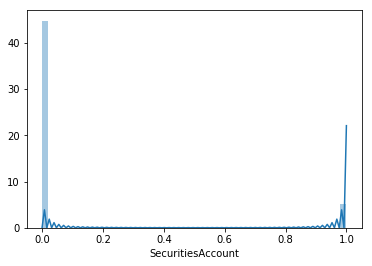

In [109]:
#SecuritiesAccount data
#=======================
sns.distplot(bank_df['SecuritiesAccount'])
# Securities Account is a categorical variable with majority of the customers dont have security account. 

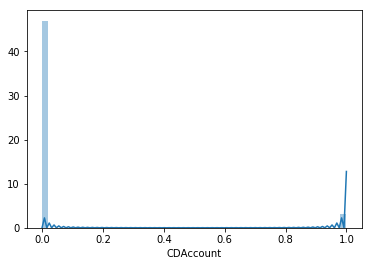

In [110]:
#CDAccount data
#================
sns.distplot(bank_df['CDAccount'])
# CDAccount is a categorical variable with majority of the customers don't have CD account.

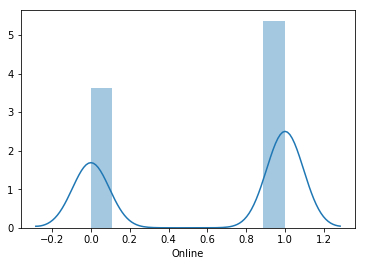

In [111]:
#Online data
#==============
sns.distplot(bank_df['Online'])
#Online is a categorical variable with majority of the customers are online.

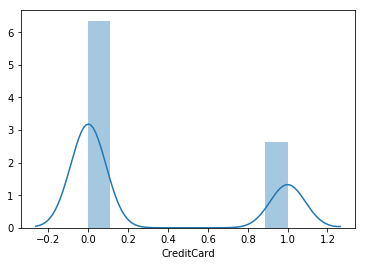

In [112]:
#CreditCard data
#=============
sns.distplot(bank_df['CreditCard'])
#CreditCard is a categorical variable with majority of the customers are not having credit card.

0    4520
1     480
Name: PersonalLoan, dtype: int64


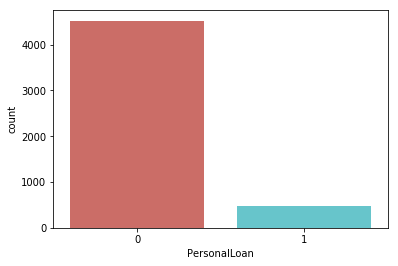

In [113]:
#Target Variable (Personal Loan)
#======================
#Personal Loan column has the list of customers who accepted the loan or not? (binary 1: mean "yes" , 0: means "no")
print(bank_df['PersonalLoan'].value_counts())
#around 90% of our target observations is (0 = Not accepted) and 10% is (1=accepted)
sns.countplot(x='PersonalLoan', data=bank_df, palette='hls')
#90% of our data contains 0 = Loan not accepted and 10% who accepted
#Data is not so balanced

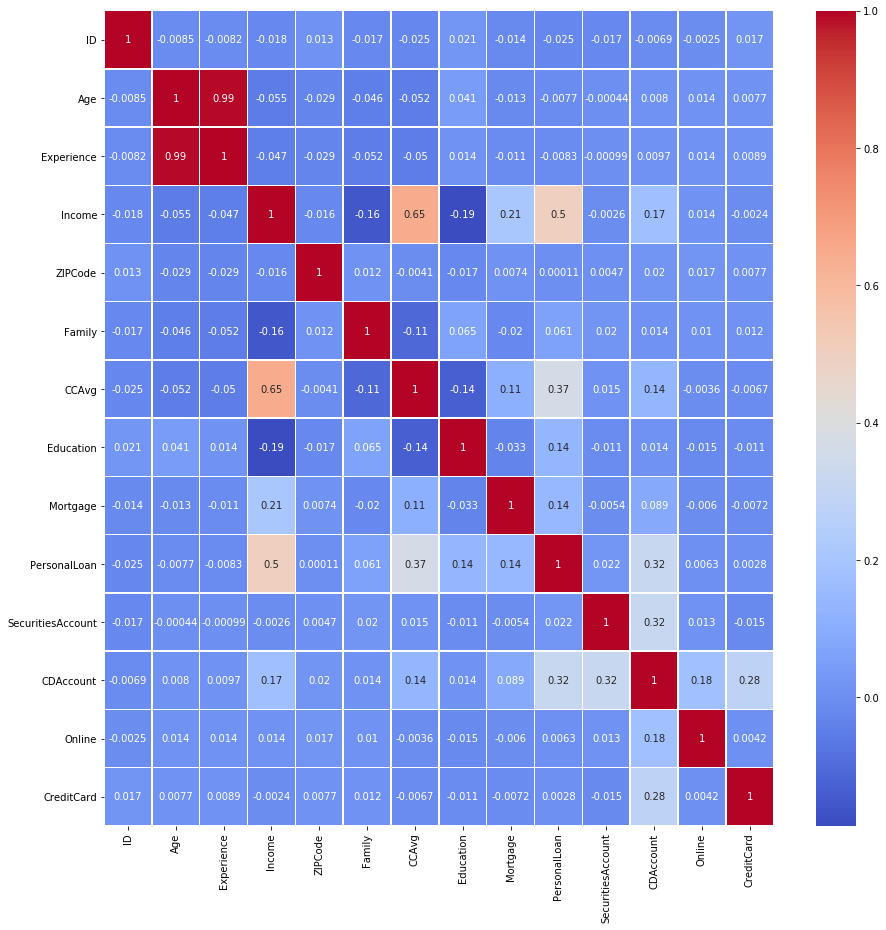

In [114]:
#checking the corelation between variables
#============================================
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(bank_df.corr(), annot=True, linewidths=.5, ax=ax,cmap='coolwarm')

#Columns 'ID' and 'ZipCode' don't contribute much to the Personal loan so we can it
#Age and Experience columns are highly correlated so we are dropping the column 'Experience' as we have manipulated the 
#Experience data as well

In [115]:
#neg_id_to_drop=list(bank_df[bank_df['Experience']<0]['ID'])
#neg_id_to_drop
#indexes_to_keep = set(range(bank_df.shape[0])) - set(neg_id_to_drop)
#bank_df_non_negative= bank_df.take(list(indexes_to_keep))
#bank_df_non_negative.head()

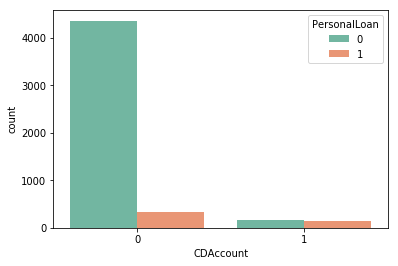

In [187]:
sns.countplot(x='CDAccount',data=bank_df,hue='PersonalLoan',palette='Set2')
#Customers who does not have CD account , does not have loan as well. 
# But almost all customers who has CD account has loan as well

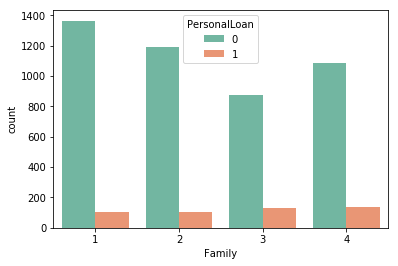

In [117]:
sns.countplot(x='Family',data=bank_df,hue='PersonalLoan',palette='Set2')
#No of members in the family don't have much impact on buying personal loan. Comaparitively the family size of 3 and 4 
#are more likely to respond.

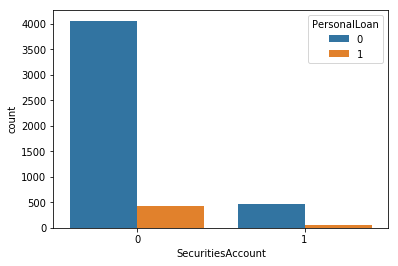

In [118]:
sns.countplot(x="SecuritiesAccount", data=bank_df,hue="PersonalLoan")
# Majority of customers who does not have loan have securities account

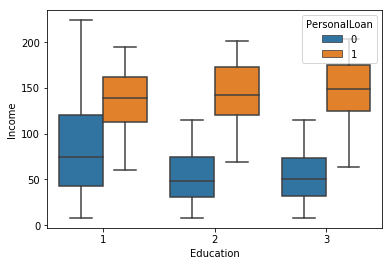

In [119]:
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=bank_df)
# It seems the customers whose education level is 1 is having more income. 
#However customers who has taken the personal loan have the same income.

In [120]:
#Dropping The columns before applying model
#==========================================
bank_df.drop(['ID','ZIPCode','Experience'], axis=1, inplace=True)
bank_df.columns 

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'PersonalLoan', 'SecuritiesAccount', 'CDAccount', 'Online',
       'CreditCard'],
      dtype='object')

In [121]:
#Feature Scaling
#====================
print(bank_df.columns)
X_vif = bank_df.copy()
#this function will get the VIF and drop the column which have VIF greater than 10
def get_vif(df):
    vif_df = pd.DataFrame()
    vif_df["colname"] = df.columns
    vif_df["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif_df.sort_values('VIF',inplace=True,ascending=False)
    print(vif_df)
    if (vif_df.iloc[0,1] > 10):
        df = df.drop([vif_df.iloc[0,0]],axis=1)
    return(df)
X_vif = get_vif(X_vif)
X_vif.columns
#We will not drop any more columns as VIF is less than 10 for remainig columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'PersonalLoan', 'SecuritiesAccount', 'CDAccount', 'Online',
       'CreditCard'],
      dtype='object')
              colname       VIF
0                 Age  9.178429
1              Income  6.728194
4           Education  5.358376
2              Family  4.552043
3               CCAvg  3.842705
9              Online  2.488532
6        PersonalLoan  1.669724
10         CreditCard  1.558039
8           CDAccount  1.531060
5            Mortgage  1.372927
7   SecuritiesAccount  1.268581


Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'PersonalLoan', 'SecuritiesAccount', 'CDAccount', 'Online',
       'CreditCard'],
      dtype='object')

In [ ]:
REMOVING OUTLIERS

In [122]:
#using Z-score method to remove outliers
z_score_data = np.abs(stats.zscore(bank_df))
print(z_score_data)

[[1.77441684 0.53822878 1.39741398 ... 0.25354028 1.21661774 0.64531434]
 [0.02952359 0.8641094  0.52599094 ... 0.25354028 1.21661774 0.64531434]
 [0.55299157 1.36379301 1.21685513 ... 0.25354028 1.21661774 0.64531434]
 ...
 [1.54088033 1.08136314 0.34543209 ... 0.25354028 1.21661774 0.64531434]
 [1.71536965 0.53822878 0.52599094 ... 0.25354028 0.82195086 0.64531434]
 [1.51268285 0.20043396 0.52599094 ... 0.25354028 0.82195086 1.54963239]]


In [173]:
# lets assume we want to remove the extreme outliers ,hence we are taking threshold = 4
print(np.where(z > 4))

(array([ 303,  365,  473,  479,  570,  782,  787,  952, 1167, 1339, 1372,
       1716, 1783, 1789, 1937, 2041, 2101, 2337, 2394, 2541, 2753, 2769,
       2812, 2841, 2934, 2956, 2989, 3515, 3608, 3662, 3822, 3943, 4238,
       4240, 4294, 4345, 4585, 4655, 4672, 4812, 4842, 4859], dtype=int64), array([5, 5, 5, 5, 5, 5, 3, 5, 5, 3, 5, 5, 5, 5, 5, 5, 3, 3, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
      dtype=int64))


In [177]:
bank_df_outliers = bank_df[(z < 4).all(axis=1)]
print("Rows left before removing outliers", bank_df.shape)
print("Rows left after removing outliers", bank_df_outliers.shape)
#Around 42 number of rows have been dropped which were having extreme values(outliers)
bank_df_out['PersonalLoan'].value_counts()

Rows left before removing outliers (5000, 11)
Rows left after removing outliers (4958, 11)


0    4505
1     453
Name: PersonalLoan, dtype: int64

SPLITTING DATA 

In [178]:
X = bank_df_outliers.drop("PersonalLoan", axis=1)#FEATURES/INDEPENDENT VARIABLES
Y =bank_df_outliers["PersonalLoan"]#TARGET VARIABLE

#X = bank_df.drop("PersonalLoan", axis=1)#FEATURES/INDEPENDENT VARIABLES
#Y =bank_df["PersonalLoan"]#TARGET VARIABLE
 
test_size = 0.3 # taking 70:30 training and test set
seed = 3  # Random numbmer seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

LOGISTIC REGRESSION 

In [179]:
model_logreg = LogisticRegression()
model_logreg.fit(X_train, Y_train)
Y_predict_logreg = model_logreg.predict(X_test)
model_logreg_score = model_logreg.score(X_test, Y_test)
model_logreg_score

0.9475806451612904

In [180]:
#Confusion matrix for Logistic Regression
#==============================
metrics.confusion_matrix(Y_test,Y_predict_logreg)
#=====================================
#True Positives (TP): we correctly predicted that 75 persons have taken loan
#True Negatives (TN): we correctly predicted that 1335 persons have not taken loan
#False Positives (FP): we incorrectly predicted that 22 persons have taken loan 
 #while in actual they have not taken loan(Type-I error)
#False Negatives (FN): we incorrectly predicted that 56 persons have not taken loan 
 #when in actual they have taken loan (type-II error)

array([[1335,   22],
       [  56,   75]], dtype=int64)

In [166]:
#metrics for Logistic Regression
#==============================
regAccuracy = metrics.accuracy_score(Y_test,Y_predict_logreg)
regRecall = metrics.recall_score(Y_test,Y_predict_logreg)
regPrecision = metrics.precision_score(Y_test,Y_predict_logreg)
regF1score = metrics.f1_score(Y_test,Y_predict_logreg)
print("Metrics for Logistic Regression \n Accuracy= %f \n Recall= %f \n Precision= %f \n F1Score= %f" %(regAccuracy,regRecall,regPrecision,regF1score))


Metrics for Logistic Regression 
 Accuracy= 0.945333 
 Recall= 0.615894 
 Precision= 0.794872 
 F1Score= 0.694030


In [167]:
#Optimizing probability threshold and calculating metrices for logistic regression model again accordingly
#===================================================================================================
Y_predictProb = model_logreg.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(Y_train, Y_predictProb[::,1])
optimalF1 = 0
optimalTh = 0
for th in thresholds:
    preds = np.where(model_logreg.predict_proba(X_train)[:,1] > th, 1, 0)
    f1Score = f1_score(Y_train, preds)
    if(optimalF1 < f1Score):
        optimalF1 = f1Score
        optimalTh = th
print ("optimal threshold is ",optimalTh)         

optimal threshold is  0.3875183743185489


In [181]:
#metrics for Logistic Regression with optimum threshhold
#======================================================
Opt_th_Preds = np.where(model_logreg.predict_proba(X_test)[:,1] > optimalTh, 1, 0)
testAccuracy = accuracy_score(Y_test, Opt_th_Preds)
testRecall = recall_score(Y_test, Opt_th_Preds)
testPrecision = precision_score(Y_test, Opt_th_Preds)
testF1score = f1_score(Y_test, Opt_th_Preds)
print("Metrics for Logistic Regression with optimal threshold \n Accuracy= %f \n Recall= %f \n Precision= %f \n F1Score= %f" %(testAccuracy,testRecall,testPrecision,testF1score))


Metrics for Logistic Regression with optimal threshold 
 Accuracy= 0.952957 
 Recall= 0.709924 
 Precision= 0.744000 
 F1Score= 0.726562


In [182]:
#Confusion matrix for Logistic Regression
#==============================
metrics.confusion_matrix(Y_test,Opt_th_Preds)
#=====================================
#True Positives (TP): we correctly predicted that 93 persons have taken loan
#True Negatives (TN): we correctly predicted that 1325 persons have not taken loan
#False Positives (FP): we incorrectly predicted that 32 persons have taken loan 
 #while in actual they have not taken loan(Type-I error)
#False Negatives (FN): we incorrectly predicted that 38 persons have not taken loan 
 #when in actual they have taken loan (type-II error)

array([[1325,   32],
       [  38,   93]], dtype=int64)

KNN ( K - Nearest Neighbour )

In [170]:
#defining model as KNN
#=======================
model_knn = KNeighborsClassifier(n_neighbors=19 , weights = 'uniform', metric='euclidean')
model_knn.fit(X_train, Y_train)
Y_predict_knn = model_knn.predict(X_test)
model_knn_score = model_knn.score(X_test, Y_test)
model_knn_score

0.9046666666666666

In [171]:
#Confusion matrix for KNN Model
#===================================
metrics.confusion_matrix(Y_test,Y_predict_knn)
#=====================================
#True Positives (TP): we correctly predicted that 38 persons have taken loan
#True Negatives (TN): we correctly predicted that 1319 persons have not taken loan
#False Positives (FP): we incorrectly predicted that 30 persons have taken loan 
 #while in actual they have not taken loan(Type-I error)
#False Negatives (FN): we incorrectly predicted that 113 persons have not taken loan 
 #when in actual they have taken loan (type-II error), which is very high

array([[1319,   30],
       [ 113,   38]], dtype=int64)

In [172]:
#metrics for KNN
#==============================
testAccuracy = metrics.accuracy_score(Y_test,Y_predict_knn)
testRecall = metrics.recall_score(Y_test,Y_predict_knn)
testPrecision = metrics.precision_score(Y_test,Y_predict_knn)
testF1score = metrics.f1_score(Y_test,Y_predict_knn)
print("Metrics for K Nearest Neighbours \n Accuracy= %f \n Recall= %f \n Precision= %f \n F1Score= %f" %(testAccuracy,testRecall,testPrecision,testF1score))


Metrics for K Nearest Neighbours 
 Accuracy= 0.904667 
 Recall= 0.251656 
 Precision= 0.558824 
 F1Score= 0.347032


Naive_Bayes

In [158]:
#defining model as Naive Bayes
#============================
model_GNB = GaussianNB()
model_GNB.fit(X_train, Y_train)
Y_predict_GNB = model_GNB.predict(X_test)
model_GNB_score =model_GNB.score(X_test, Y_test)
model_GNB_score

0.8891129032258065

In [183]:
#Confusion matrix for Naive -Bayes
#===================================
metrics.confusion_matrix(Y_predict_GNB, Y_test)

#=====================================
#True Positives (TP): we correctly predicted that 77 persons have taken loan
#True Negatives (TN): we correctly predicted that 1246 persons have not taken loan
#False Positives (FP): we incorrectly predicted that 54 persons have taken loan 
 #while in actual they have not taken loan(Type-I error)
#False Negatives (FN): we incorrectly predicted that 111 persons have not taken loan 
 #when in actual they have taken loan (type-II error)

array([[1246,   54],
       [ 111,   77]], dtype=int64)

In [184]:
#metrics for Naive_Bayes
#==============================
testAccuracy = metrics.accuracy_score(Y_test,Y_predict_GNB)
testRecall = metrics.recall_score(Y_test,Y_predict_GNB)
testPrecision = metrics.precision_score(Y_test,Y_predict_GNB)
testF1score = metrics.f1_score(Y_test,Y_predict_GNB)
print("Metrics for K Naive_Bayes \n Accuracy= %f \n Recall= %f \n Precision= %f \n F1Score= %f" %(testAccuracy,testRecall,testPrecision,testF1score))


Metrics for K Naive_Bayes 
 Accuracy= 0.889113 
 Recall= 0.587786 
 Precision= 0.409574 
 F1Score= 0.482759


Model comparision 

Logistic Regression: 0.564139 (0.006430)
K nearest neighbours: 0.229615 (0.007163)
Naive-Bayes: 0.556010 (0.011563)


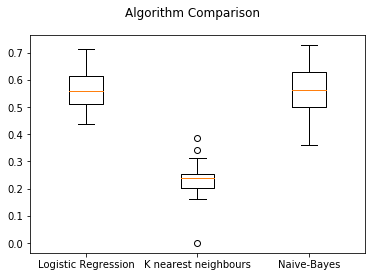

In [185]:
#Compariong models using K fold
#==================================
models = []
models.append(('Logistic Regression', model_logreg ))
models.append(('K nearest neighbours', model_knn))
models.append(('Naive-Bayes', model_GNB))
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=15,random_state=2)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='recall')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#Three classification algorithms were used to predict.
#From the above graph , it seems like Logistic Regression algorithm have the highest accuracy and 
#we can choose that as our final model